In [2]:
%matplotlib inline

In [3]:
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [4]:
def DiceRoller(n_rolls):
	try:
		dice = int(n_rolls)
	except ValueError:
		print("Number of dice to roll needs to be an integer")
	rolls = np.random.random_integers(6, size=(1.,dice))
	return rolls

In [5]:
def Shooting(BS, n_shots, twinlinked):
    try:
        BS = int(BS)
    except ValueError:
        print("BS needs to be an integer")
    try:
        n_shots = int(n_shots)
    except ValueError:
        print("Number of shots needs to be an integer")
    if twinlinked == "Y":
        shots = DiceRoller(n_shots)
        shots[shots > BS] = rand.randint(1,6)
    elif twinlinked =="N":
        shots = DiceRoller(n_shots)
    else:
        print("Designate Twin-linking with Y or N. Assumed to be off.")
        shots = DiceRoller(n_shots)

    hits = np.sum(shots.__ge__(7-BS))
    return shots,hits

In [6]:
def OldWS():
    ScatterLaser = Shooting(4,4,'Y')
    if ScatterLaser[1] >= 1:
        SS = Shooting(4,(rand.randint(1,6)+1),'Y')
    else:
        SS = Shooting(4,(rand.randint(1,6)+1),'N')
    Total = ScatterLaser[1] + SS[1]
    return Total

def OldWSFourTurns():
    Turn1 = OldWS()
    Turn2 = OldWS()
    Turn3 = OldWS()
    Turn4 = OldWS()
    Total = Turn1 + Turn2 + Turn3 + Turn4
    return Total

In [7]:
def NewWS(shield):
    ScatterLaser = Shooting(4,4,'Y')
    if shield == 1:
        SS = Shooting(4,(rand.randint(1,6)+rand.randint(1,6)),'N')
        Total = ScatterLaser[1] + SS[1]
    else:
        Total = ScatterLaser[1]
    return Total

def NewWSFourTurns():
    Turn1 = NewWS(shield=1)
    Turn2 = NewWS(shield=0)
    Turn3 = NewWS(shield=0)
    Turn4 = NewWS(shield=0)
    Total = Turn1 + Turn2 + Turn3 + Turn4
    return Total

In [8]:
a = OldWSFourTurns()
print a
b = NewWSFourTurns()
print b

23
12


In [9]:
runs = 2500

In [10]:
comparison = np.empty([runs,2])

In [11]:
for i in range(runs):
    comparison[i][0] = OldWSFourTurns()
    comparison[i][1] = NewWSFourTurns()

In [12]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

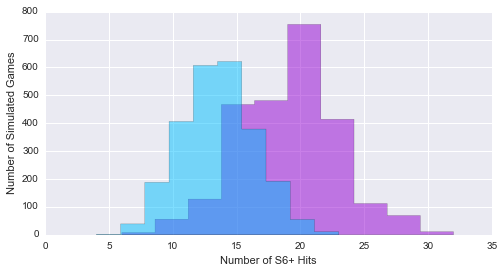

In [16]:
plt.hist(comparison[:,0],alpha=0.50,bins=10,color="DarkViolet",histtype="stepfilled")
plt.hist(comparison[:,1],alpha=0.50,bins=10,color="DeepSkyBlue",histtype="stepfilled")
plt.xlabel("Number of S6+ Hits")
plt.ylabel("Number of Simulated Games")